In [1]:
import sys
import spectral as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, Bbox
from matplotlib.colors import Normalize
from sklearn.decomposition import PCA
from scipy.stats import gamma, norm, poisson

from preprocessing import *
from plotting_parameters import *
# matplotlib.use("wxAgg")
%matplotlib inline
set_plotting_style("default")
# set_plotting_style("latex")

### Models for influence of specular reflection before and after normalization of projection using Dirichlet and LMM

(400.0, 1000.0)

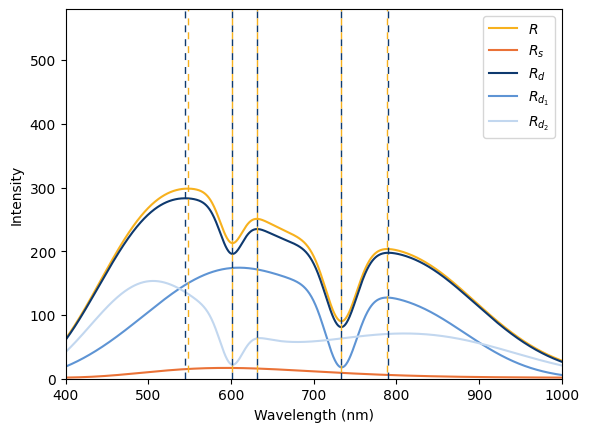

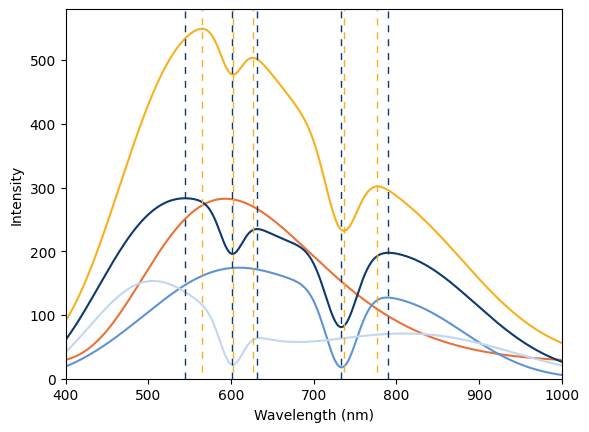

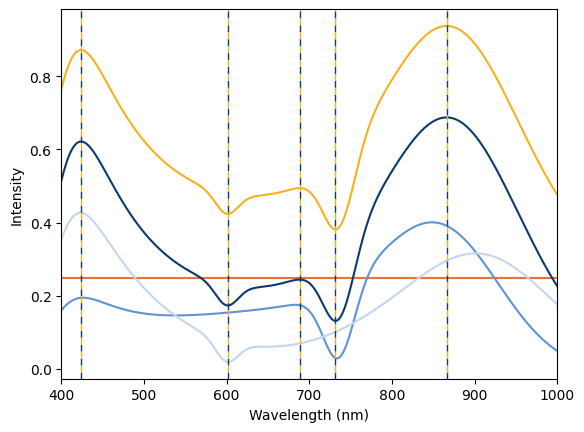

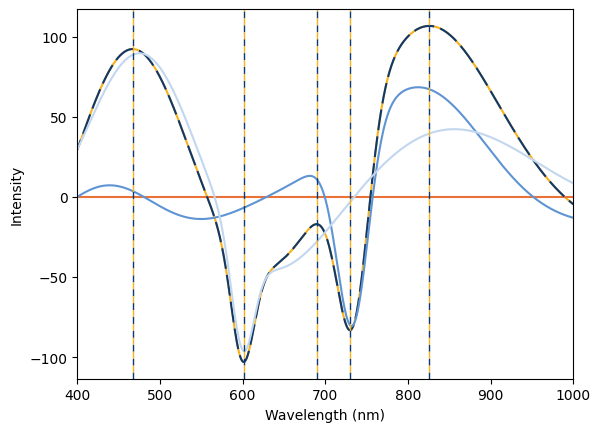

In [2]:
x = np.linspace(2.5, 25, 1000)

# emitted light
alpha = 7.5
beta = 1.5
y_emitted = (gamma.pdf(x, alpha, scale=beta) + 0.01)*10000

# specuar component
# add gaussian noise
y_specular1 = y_emitted *0.015
y_specular2 = y_emitted *0.25

# fist diffuse component
mu1, sigma1 = 10, 4
mu2, sigma2 = 18, 3
mu3, sigma3 = 15, 0.7
mu4, sigma4 = 2, 10
y_diffuse1 = (norm.pdf(x, mu1, sigma1)*0.6 + norm.pdf(x, mu2, sigma2)*0.25 - norm.pdf(x,mu3, sigma3)*0.07 - norm.pdf(x, mu4, sigma4)*0.1)*0.3*10000

# second diffuse component
mu1, sigma1 = 5, 3
mu2, sigma2 = 20, 5
mu3, sigma3 = 10, 0.5
mu4, sigma4 = 3.5, 3
mu5, sigma5 = 25, 5
y_diffuse2 = (norm.pdf(x, mu1, sigma1) + norm.pdf(x, mu2, sigma2)*0.4 - norm.pdf(x, mu3, sigma3)*0.04 - norm.pdf(x, mu4, sigma4)*0.7 - norm.pdf(x, mu5, sigma5)*0.3)*0.2*10000 + 30

# total reflection
diffuse_reflection = y_diffuse1 + y_diffuse2
reflection1 = y_specular1 + y_diffuse1 + y_diffuse2
reflection2 = y_specular2 + y_diffuse1 + y_diffuse2

def get_extrema_idx(y):
    idx = []
    for i in range(1, len(y)-1):
        if (y[i-1] < y[i] and y[i] > y[i+1]) or (y[i-1] > y[i] and y[i] < y[i+1]):
            idx = np.append(idx, i)
    idx = np.asarray(idx, dtype=int)
    return idx


P_E = np.eye(x.shape[0]) - np.outer(y_emitted, y_emitted)/np.dot(y_emitted, y_emitted)
# find idx of extram
diffuse_reflection_extrema_idx = get_extrema_idx(diffuse_reflection)
diffuse_reflection_norm_extrema_idx = get_extrema_idx(diffuse_reflection/y_emitted)
diffuse_reflection_proj_extrema_idx = get_extrema_idx(P_E @ diffuse_reflection)
reflection1_extrema_idx = get_extrema_idx(reflection1)
reflection2_extrema_idx = get_extrema_idx(reflection2)
reflection2_norm_extrema_idx = get_extrema_idx(reflection2/y_emitted)
reflection2_proj_extrema_idx = get_extrema_idx(P_E @ reflection2)


# Plot the distribution
fig, ax = plt.subplots(1, 1)
bands = np.linspace(400,1000,1000)
# ax.plot(bands, y_emitted, label='Emitted Light')
ax.plot(bands, reflection1, label='$R$', color=tum_orange)
ax.plot(bands, y_specular1, label='$R_{s}$', color=tum_red)
ax.plot(bands, diffuse_reflection, label='$R_{d}$', color=tum_blue_dark_2)
ax.plot(bands, y_diffuse1, label='$R_{d_1}$', color=tum_blue_light)
ax.plot(bands, y_diffuse2, label='$R_{d_2}$', color=tum_blue_light_2)
# plot vertical lines at the extrama
for i in diffuse_reflection_extrema_idx:
    ax.axvline(x=bands[i], color=tum_blue_dark_2, linestyle=(0,(5,5)), linewidth=1)
for i in reflection1_extrema_idx:
    ax.axvline(x=bands[i], color=tum_orange, linestyle=(5,(5,5)), linewidth=1)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
ax.set_xlim([400,1000])
ax.set_ylim([0,580])
# ax.set_title('Small specular component')
ax.legend()
# fig.savefig('figures/model_spectrum_small_specular.svg', format='svg', dpi=1000)

fig, ax = plt.subplots(1, 1)
bands = np.linspace(400,1000,1000)
# ax.plot(bands, y_emitted, label='Emitted Light')
ax.plot(bands, reflection2, label='$R$', color=tum_orange)
ax.plot(bands, y_specular2, label='$R_{s}$', color=tum_red)
ax.plot(bands, diffuse_reflection, label='$R_{d}$', color=tum_blue_dark_2)
ax.plot(bands, y_diffuse1, label='$R_{d_1}$', color=tum_blue_light)
ax.plot(bands, y_diffuse2, label='$R_{d_2}$', color=tum_blue_light_2)
# plot vertical lines at the extrama
for i in diffuse_reflection_extrema_idx:
    ax.axvline(x=bands[i], color=tum_blue_dark_2, linestyle=(0,(5,5)), linewidth=1)
for i in reflection2_extrema_idx:
    ax.axvline(x=bands[i], color=tum_orange, linestyle=(5,(5,5)), linewidth=1)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
ax.set_xlim([400,1000])
ax.set_ylim([0,580])
# ax.set_title('large specular component')
# ax.legend()
# fig.savefig('figures/model_spectrum_large_specular.svg', format='svg', dpi=1000)


fig, ax = plt.subplots(1, 1)
bands = np.linspace(400,1000,1000)
ax.plot(bands, reflection2/y_emitted, label='$R$', color=tum_orange)
ax.plot(bands, y_specular2/y_emitted, label='$R_{specular}$', color=tum_red)
ax.plot(bands, diffuse_reflection/y_emitted, label='$R_{diffuse}$', color=tum_blue_dark_2)
ax.plot(bands, y_diffuse1/y_emitted, label='$R_{diffuse,1}$', color=tum_blue_light)
ax.plot(bands, y_diffuse2/y_emitted, label='$R_{diffuse,2}$', color=tum_blue_light_2)
# plot vertical lines at the extrama
for i in diffuse_reflection_norm_extrema_idx:
    ax.axvline(x=bands[i], color=tum_blue_dark_2, linestyle=(0,(5,5)), linewidth=1)
for i in reflection2_norm_extrema_idx:
    ax.axvline(x=bands[i], color=tum_orange, linestyle=(5,(5,5)), linewidth=1)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
ax.set_xlim([400,1000])
# ax.set_title('Large specular component, normalized by dividing with emitted light spectrum')
# ax.legend()
# fig.savefig('figures/model_spectrum_normalized.svg', format='svg', dpi=1000)

fig, ax = plt.subplots(1, 1)
bands = np.linspace(400,1000,1000)
ax.plot(bands, P_E @ reflection2, label='$R$', color=tum_orange)
ax.plot(bands, P_E @ y_specular2, label='$R_{specular}$', color=tum_red)
ax.plot(bands, P_E @ diffuse_reflection, label='$R_{diffuse}$', color=tum_blue_dark_2, linestyle=(5,(10,3)))
ax.plot(bands, P_E @ y_diffuse1, label='$R_{diffuse,1}$', color=tum_blue_light)
ax.plot(bands, P_E @ y_diffuse2, label='$R_{diffuse,2}$', color=tum_blue_light_2)
# plot vertical lines at the extrama
for i in diffuse_reflection_proj_extrema_idx:
    ax.axvline(x=bands[i], color=tum_blue_dark_2, linestyle=(0,(5,5)), linewidth=1)
for i in reflection2_proj_extrema_idx:
    ax.axvline(x=bands[i], color=tum_orange, linestyle=(5,(5,5)), linewidth=1)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
ax.set_xlim([400,1000])
# ax.set_title('Large specular component, projected onto the orthogonal space of emitted light spectrum')
# ax.legend()
# fig.savefig('figures/model_spectrum_projected.svg', format='svg', dpi=1000)


### Modeling of reflection as multiple scattering events

illumination spectrum and probability of absorption at each scattering event

Text(0.5, 1.0, 'PDF of number of scattering events of reflected photons')

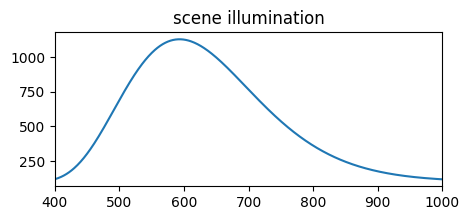

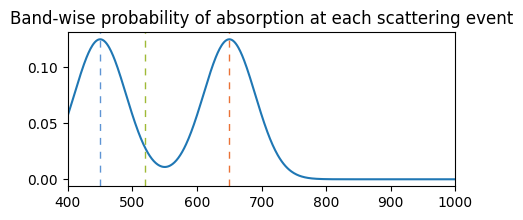

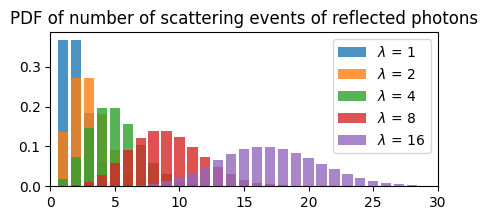

In [4]:
bands = np.arange(400,1000,1)

# scene illumination
alpha = 7.5
beta = 1.5
e = (gamma.pdf(np.linspace(2.5, 25, 600), alpha, scale=beta) + 0.01)*10000

plt.figure(figsize=(5,2))
plt.plot(bands,e)
plt.title('scene illumination')
plt.xlim([400,1000])

# probabiitly of absorption for each band
mu_a_1, sigma_a_1 = 450, 40
mu_a_2, sigma_a_2 = 650, 40
p_a = (norm.pdf(bands, mu_a_1, sigma_a_1) + norm.pdf(bands, mu_a_2, sigma_a_2))/2 * 100
p_a = p_a *0.25

plt.figure(figsize=(5,2))
plt.plot(bands,p_a)
plt.title('Band-wise probability of absorption at each scattering event')
plt.xlim([400,1000])
plt.axvline(x=bands[50], color=tum_blue_light, linestyle=(0,(5,5)), linewidth=1)
plt.axvline(x=bands[120], color=tum_green, linestyle=(0,(5,5)), linewidth=1)
plt.axvline(x=bands[250], color=tum_red, linestyle=(0,(5,5)), linewidth=1)

# pdf of number of scattering events of reflected photons modeled as a poisson distribution
N = np.arange(0,30,1)
lams = [1,2,4,8,16]
plt.figure(figsize=(5,2))
for i, lam in enumerate(lams):
    p_N = poisson.pmf(N, lam)
    plt.bar(np.arange(1,N.shape[0]+1,1), p_N, label='$\lambda$ = {}'.format(lam), alpha=0.8)	
plt.xlim([0,N.shape[0]])
plt.legend()
plt.title('PDF of number of scattering events of reflected photons')


Scattering events independent of wavelength

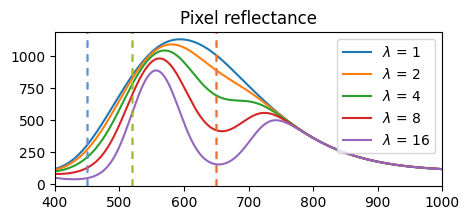

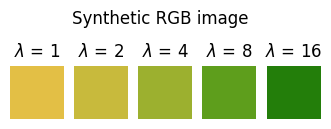

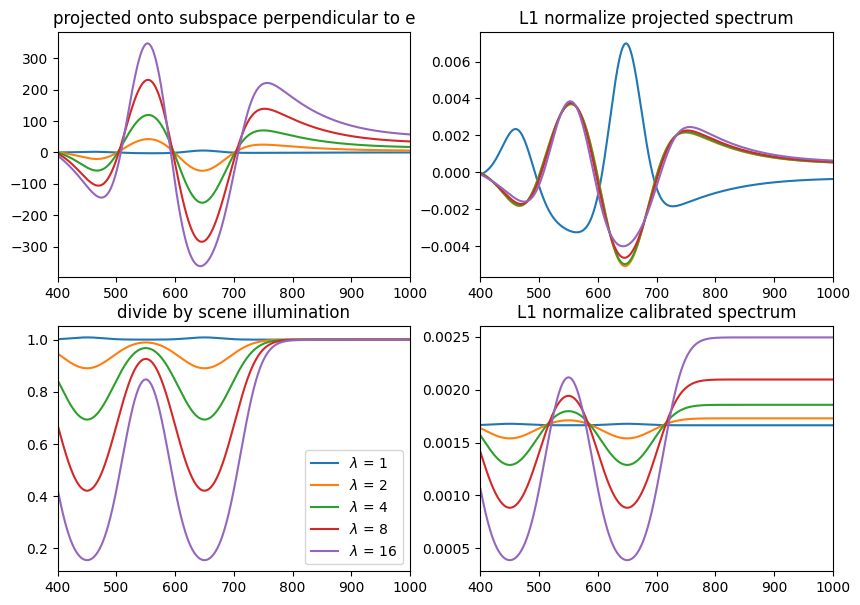

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,2))
fig2, axs2 = plt.subplots(1,len(lams), figsize=(4,1.7))
fig1, axs1 = plt.subplots(2,2, figsize=(10,7))

for i,lam in enumerate(lams):

    p_N = poisson.pmf(N, lam)

    # scene reflectance
    r = np.zeros((600))
    for k in range(N.shape[0]):
        r = r + (1-p_a)**(k-1) * p_N[k] * e

    # project onto subspace perpendicular to e
    P_e = np.eye(e.shape[0]) - np.outer(e, e)/np.dot(e, e)
    r_proj = P_e @ r

    # L1 normalize projected spectrum
    r_norm = r_proj/np.linalg.norm(r_proj,1)

    # divide by scene illumination
    r_calib = r/e

    # L1 normalize calibrated spectrum
    r_calib_norm = r_calib/np.linalg.norm(r_calib,1)

    r_calib_norm_2 = (r_calib - np.min(r_calib))/(np.max(r_calib) - np.min(r_calib))

    ax.plot(bands, r, label='$\lambda$ = {}'.format(lam))
    ax.set_title('Pixel reflectance')
    ax.set_xlim([400,1000])
    ax.axvline(x=bands[50], color=tum_blue_light, linestyle=(0,(5,5)), linewidth=1)
    ax.axvline(x=bands[120], color=tum_green, linestyle=(0,(5,5)), linewidth=1)
    ax.axvline(x=bands[250], color=tum_red, linestyle=(0,(5,5)), linewidth=1)

    pixel_rgb = np.array([r[250], r[120], r[50]])/np.max(e)
    pixel_image = np.expand_dims(np.expand_dims(pixel_rgb, axis=0), axis=0)
    axs2[i].imshow(pixel_image)
    axs2[i].set_title('$\lambda$ = {}'.format(lam))
    axs2[i].axis('off')
    fig2.suptitle('Synthetic RGB image')

    axs1[0,0].plot(bands, r_proj, label='$\lambda$ = {}'.format(lam))
    axs1[0,0].set_title('projected onto subspace perpendicular to e')
    axs1[0,0].set_xlim([400,1000])
    axs1[0,1].plot(bands, r_norm, label='$\lambda$ = {}'.format(lam))
    axs1[0,1].set_title('L1 normalize projected spectrum')
    axs1[0,1].set_xlim([400,1000])
    axs1[1,0].plot(bands, r_calib, label='$\lambda$ = {}'.format(lam))
    axs1[1,0].set_title('divide by scene illumination')
    axs1[1,0].set_xlim([400,1000])
    axs1[1,1].plot(bands, r_calib_norm, label='$\lambda$ = {}'.format(lam))
    axs1[1,1].set_title('L1 normalize calibrated spectrum')
    axs1[1,1].set_xlim([400,1000])

ax.legend()
axs1[1,0].legend(loc='lower right')
# axs1[0,0].legend()

Scattering events dependent on wavelength (quadratic term centered around 700nm)

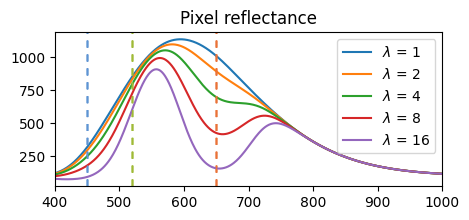

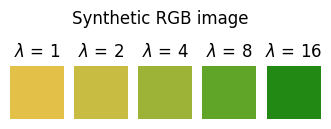

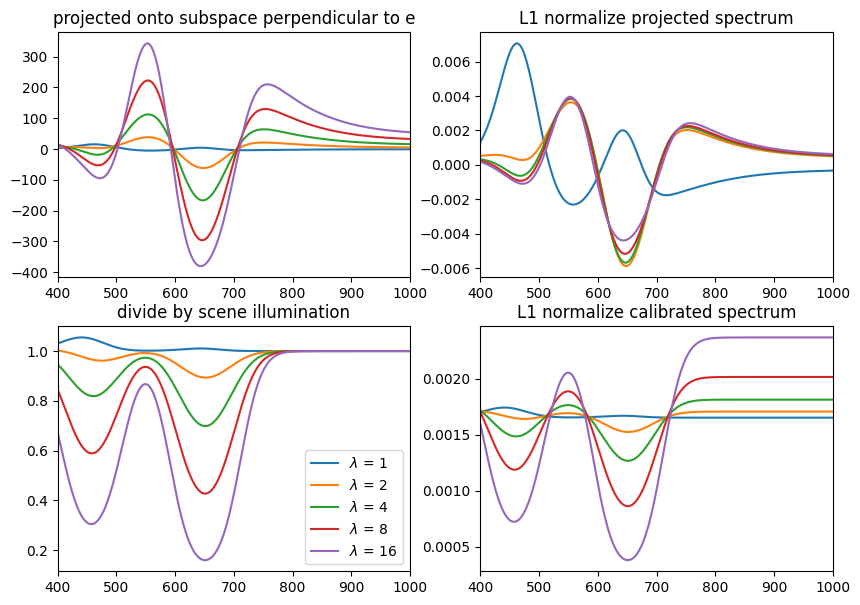

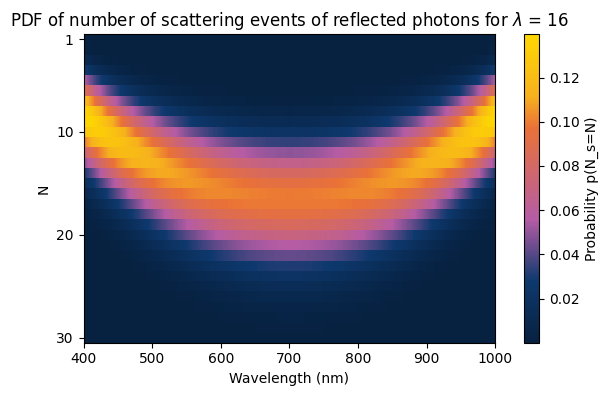

In [270]:
fig, ax = plt.subplots(1,1, figsize=(5,2))
fig2, axs2 = plt.subplots(1,len(lams), figsize=(4,1.7))
fig1, axs1 = plt.subplots(2,2, figsize=(10,7))
# fig3, axs3 = plt.subplots(1,1, figsize=(5,2))


for i,lam in enumerate(lams):

    offset = np.concatenate((np.linspace(1,0,300), np.linspace(0,1,300)))
    lam2 = (np.ones((600)) - offset**2*0.5)*lam
    p_N = np.zeros((N.shape[0],600))
    for j in range(600):
        p_N[:,j] = poisson.pmf(N, lam2[j])

    # axs3.plot(bands, lam2, label='$\lambda$ = {}'.format(lam))
    # axs3.set_title('Parameter $\lambda$ of Poisson distribution for each band')

    if i==4:
        # # plot 3d bar diagram of p_N
        # fig4 = plt.figure()
        # ax4 = fig4.add_subplot(111, projection='3d')
        # x, y = np.meshgrid(np.arange(0,50,1), np.arange(400,1000,1))
        # # Flatten the 2D arrays to 1D arrays
        # x = x.flatten()
        # y = y.flatten()
        # z = np.zeros_like(x).flatten()
        # # Heights of the bars
        # heights = p_N.flatten()
        # # Use bar3d to plot the 3D bars
        # ax4.bar3d(x, y, z, 1, 1, heights, shade=True)

        fig6, ax6 = plt.subplots(figsize=(6.5,4))
        heatmap = ax6.imshow(p_N, cmap=tum_cmap, interpolation='nearest')
        ax6.set_aspect(15)
        ax6.set_xlabel('Wavelength (nm)')
        ax6.set_ylabel('N')
        ax6.set_title('PDF of number of scattering events of reflected photons for $\lambda$ = {}'.format(lam))
        # set ticks labels
        ax6.set_xticks(np.arange(0,601,100))
        ax6.set_xticklabels(np.arange(400,1001,100))
        ax6.set_yticks([0,9,19,29])
        ax6.set_yticklabels([1,10,20,30])
        # set colorbar
        cbar = fig6.colorbar(heatmap, ax=ax6)
        cbar.set_label('Probability p(N_s=N)')
        fig6.tight_layout()

    # scene reflectance
    r = np.zeros((600))
    for k in range(N.shape[0]):
        r = r + (1-p_a)**(k-1) * p_N[k] * e

    # project onto subspace perpendicular to e
    P_e = np.eye(e.shape[0]) - np.outer(e, e)/np.dot(e, e)
    r_proj = P_e @ r

    # L1 normalize projected spectrum
    r_norm = r_proj/np.linalg.norm(r_proj,1)

    # divide by scene illumination
    r_calib = r/e

    # L1 normalize calibrated spectrum
    r_calib_norm = r_calib/np.linalg.norm(r_calib,1)

    ax.plot(bands, r, label='$\lambda$ = {}'.format(lam))
    ax.set_title('Pixel reflectance')
    ax.set_xlim([400,1000])
    ax.axvline(x=bands[50], color=tum_blue_light, linestyle=(0,(5,5)), linewidth=1)
    ax.axvline(x=bands[120], color=tum_green, linestyle=(0,(5,5)), linewidth=1)
    ax.axvline(x=bands[250], color=tum_red, linestyle=(0,(5,5)), linewidth=1)

    pixel_rgb = np.array([r[250], r[120], r[50]])/np.max(e)
    pixel_image = np.expand_dims(np.expand_dims(pixel_rgb, axis=0), axis=0)
    axs2[i].imshow(pixel_image)
    axs2[i].set_title('$\lambda$ = {}'.format(lam))
    axs2[i].axis('off')
    fig2.suptitle('Synthetic RGB image')

    axs1[0,0].plot(bands, r_proj, label='$\lambda$ = {}'.format(lam))
    axs1[0,0].set_title('projected onto subspace perpendicular to e')
    axs1[0,0].set_xlim([400,1000])
    axs1[0,1].plot(bands, r_norm, label='$\lambda$ = {}'.format(lam))
    axs1[0,1].set_title('L1 normalize projected spectrum')
    axs1[0,1].set_xlim([400,1000])
    axs1[1,0].plot(bands, r_calib, label='$\lambda$ = {}'.format(lam))
    axs1[1,0].set_title('divide by scene illumination')
    axs1[1,0].set_xlim([400,1000])
    axs1[1,1].plot(bands, r_calib_norm, label='$\lambda$ = {}'.format(lam))
    axs1[1,1].set_title('L1 normalize calibrated spectrum')
    axs1[1,1].set_xlim([400,1000])

ax.legend()
axs1[1,0].legend(loc='lower right')